CHARGEMENT DE LA BASE

In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/Market_retail.csv")

ANALYSE EXPLORATOIRE

In [3]:
data.head()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,BN-2011-7407039,1/1/2011,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",$ 0.5,$ 45,$ -26,3,False
1,AZ-2011-9050313,1/3/2011,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",$ -,$ 854,$ 290,7,True
2,AZ-2011-6674300,1/4/2011,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",$ -,$ 140,$ 21,3,True
3,BN-2011-2819714,1/4/2011,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",$ 0.5,$ 27,$ -22,2,True
4,BN-2011-2819714,1/4/2011,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",$ 0.5,$ 17,$ -1,2,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order ID       8047 non-null   object
 1   Order Date     8047 non-null   object
 2   Customer Name  8047 non-null   object
 3   Country        8047 non-null   object
 4   State          8047 non-null   object
 5   City           8047 non-null   object
 6   Region         8047 non-null   object
 7   Segment        8047 non-null   object
 8   Ship Mode      8047 non-null   object
 9   Category       8047 non-null   object
 10  Sub-Category   8047 non-null   object
 11  Product Name   8047 non-null   object
 12   Discount      8047 non-null   object
 13   Sales         8047 non-null   object
 14   Profit        8047 non-null   object
 15  Quantity       8047 non-null   int64 
 16  Feedback?      8047 non-null   bool  
dtypes: bool(1), int64(1), object(15)
memory usage: 1013.9+ KB


In [5]:
data.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'Country', 'State', 'City',
       'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category',
       'Product Name', ' Discount ', ' Sales ', ' Profit ', 'Quantity',
       'Feedback?'],
      dtype='object')

In [6]:
data = data.rename(columns={" Discount ": "Discount"," Sales ":'Sales', " Profit " : 'Profit' })

In [7]:
data.shape

(8047, 17)

In [8]:
data.describe()

,Quantity
count,8047.000000
mean,3.772089
std,2.203369
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,14.000000


In [9]:
data.isnull().sum()

Order ID         0
Order Date       0
Customer Name    0
Country          0
State            0
City             0
Region           0
Segment          0
Ship Mode        0
Category         0
Sub-Category     0
Product Name     0
Discount         0
Sales            0
Profit           0
Quantity         0
Feedback?        0
dtype: int64

In [10]:
data['Discount'] = data['Discount'].fillna(0)
data['Profit'] = data['Profit'].fillna(0)

In [11]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y').dt.strftime('%d/%m/%Y')

In [12]:
data['Customer Name'].value_counts()

Customer Name
Joel Peters         32
Jose Gambino        30
Isaac David         29
Angie Massengill    28
Lori Miller         27
                    ..
Audry Smith          1
Dakota Baynes        1
Jodie Garner         1
Max Baker            1
Jay Collier          1
Name: count, Length: 792, dtype: int64

In [13]:
data['Country'].value_counts()

Country
France            1916
Germany           1640
United Kingdom    1314
Italy              979
Spain              761
Netherlands        393
Austria            264
Sweden             203
Belgium            135
Ireland            100
Switzerland         78
Norway              70
Portugal            70
Finland             64
Denmark             60
Name: count, dtype: int64

In [14]:
data['Segment'].value_counts()

Segment
Consumer       4174
Corporate      2514
Home Office    1359
Name: count, dtype: int64

In [15]:
data['Ship Mode'].value_counts()

Ship Mode
Economy         4862
Economy Plus    1590
Priority        1169
Immediate        426
Name: count, dtype: int64

In [16]:
data['Category'].value_counts()

Category
Office Supplies    5286
Technology         1523
Furniture          1238
Name: count, dtype: int64

In [17]:
data['Sub-Category'].value_counts()

Sub-Category
Art            1152
Binders        1059
Storage        1051
Phones          453
Bookcases       391
Furnishings     389
Chairs          383
Paper           374
Labels          372
Accessories     368
Copiers         367
Fasteners       350
Supplies        347
Envelopes       346
Machines        335
Appliances      235
Tables           75
Name: count, dtype: int64

In [18]:
data['Product Name'].value_counts()

Product Name
Eldon File Cart, Single Width            26
Rogers File Cart, Single Width           23
Sanford Pencil Sharpener, Water Color    22
Stanley Pencil Sharpener, Water Color    22
Tenex File Cart, Single Width            21
                                         ..
StarTech Receipt Printer, White           1
Ames Mailers, with clear poly window      1
Cameo Mailers, Security-Tint              1
SanDisk Memory Card, USB                  1
Panasonic Card Printer, Red               1
Name: count, Length: 1810, dtype: int64

In [25]:
data.to_csv('BC_Market_Retail.csv')

In [19]:
cols_to_convert = ["Discount", "Sales", "Profit"]

for col in cols_to_convert:
    data[col] = data[col].astype(str).str.replace('[\$,]', '', regex=True)  # Supprime les "$" et ","
    data[col] = data[col].replace('-', '0')  # Remplace "-" par "0" (si nécessaire)
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convertit en float, met NaN si erreur

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\nicol\AppData\Local\Temp\ipykernel_9012\3277265494.py:4: SyntaxWarning: invalid escape sequence '\$'
  data[col] = data[col].astype(str).str.replace('[\$,]', '', regex=True)  # Supprime les "$" et ","


In [20]:
cols_to_encode = ['Country', 'Category', 'Sub-Category', 'Segment', 'Ship Mode']

data_encoded = pd.get_dummies(data, columns=cols_to_encode, drop_first=True)

In [21]:
data_numeric = data_encoded.select_dtypes(include=['float64', 'int64', 'bool'])

In [22]:
data_numeric.columns

Index(['Discount', 'Sales', 'Profit', 'Quantity', 'Feedback?',
       'Country_Belgium', 'Country_Denmark', 'Country_Finland',
       'Country_France', 'Country_Germany', 'Country_Ireland', 'Country_Italy',
       'Country_Netherlands', 'Country_Norway', 'Country_Portugal',
       'Country_Spain', 'Country_Sweden', 'Country_Switzerland',
       'Country_United Kingdom', 'Category_Office Supplies',
       'Category_Technology', 'Sub-Category_Appliances', 'Sub-Category_Art',
       'Sub-Category_Binders', 'Sub-Category_Bookcases', 'Sub-Category_Chairs',
       'Sub-Category_Copiers', 'Sub-Category_Envelopes',
       'Sub-Category_Fasteners', 'Sub-Category_Furnishings',
       'Sub-Category_Labels', 'Sub-Category_Machines', 'Sub-Category_Paper',
       'Sub-Category_Phones', 'Sub-Category_Storage', 'Sub-Category_Supplies',
       'Sub-Category_Tables', 'Segment_Corporate', 'Segment_Home Office',
       'Ship Mode_Economy Plus', 'Ship Mode_Immediate', 'Ship Mode_Priority'],
      dtype='ob

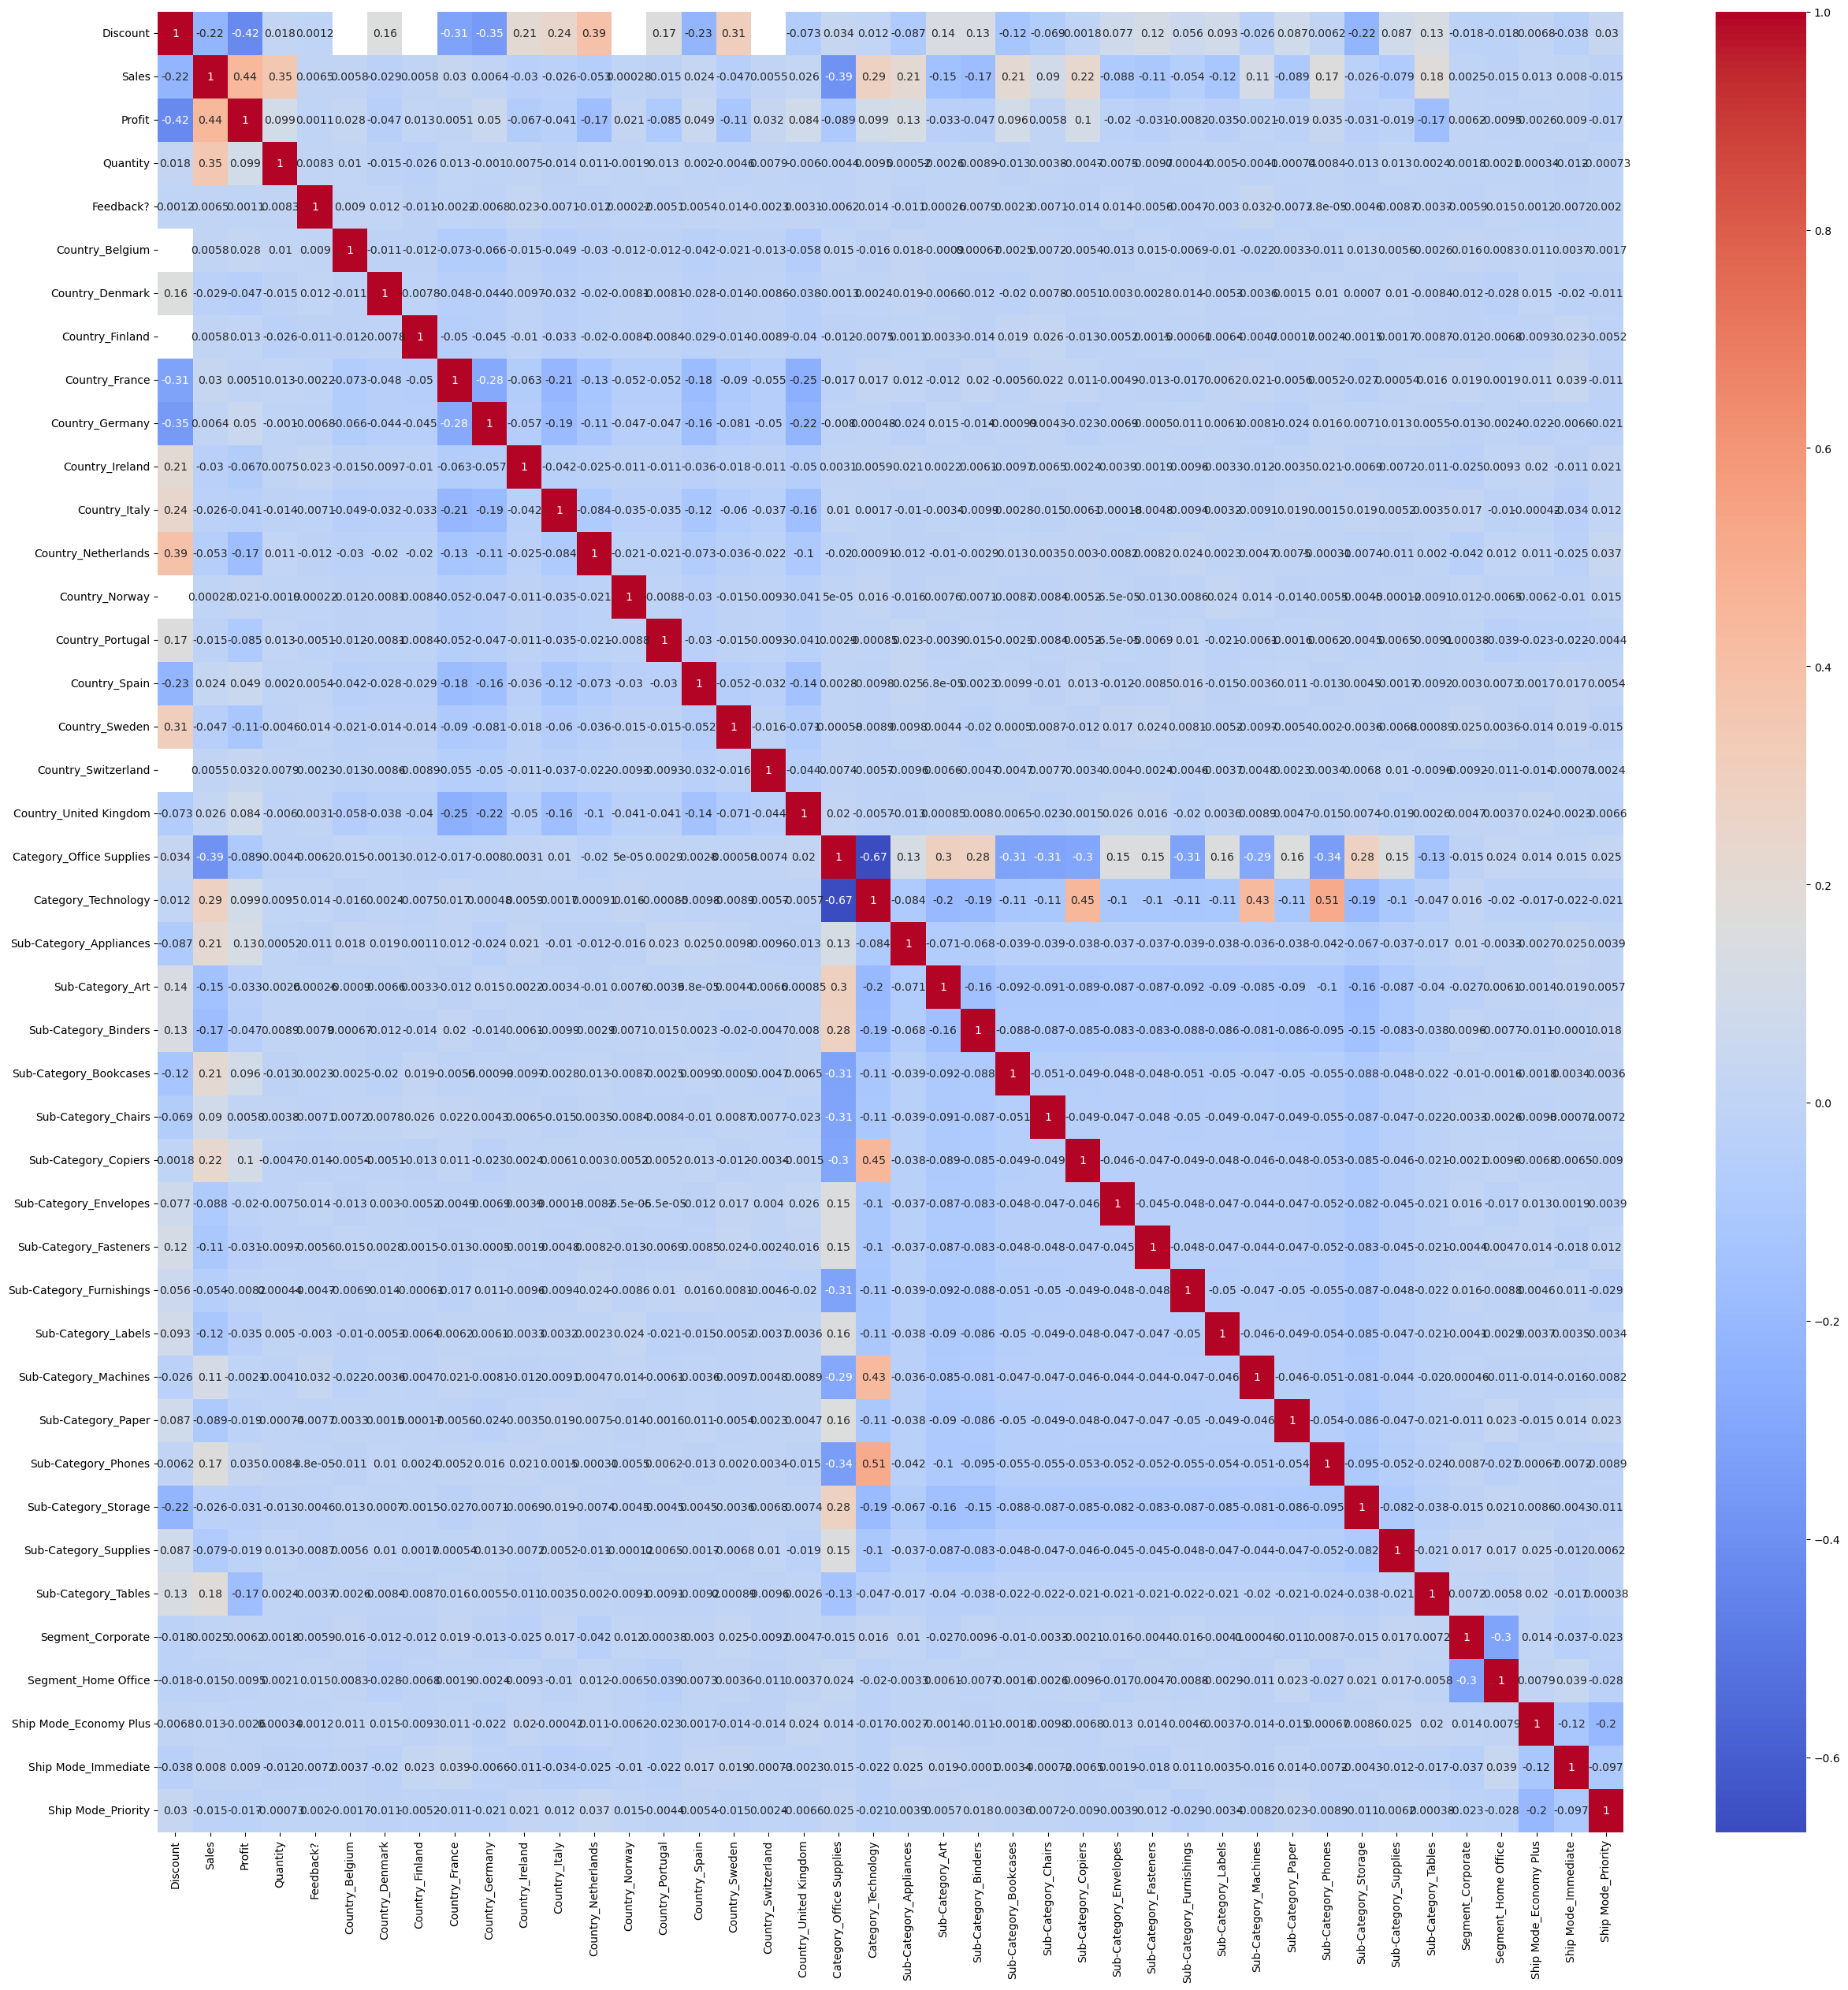

In [23]:
corr = data_numeric.corr()

plt.figure(figsize=(30, 30))

sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()